In [1]:
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *

In [6]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
path.ls()

(#2) [Path('training'),Path('testing')]

In [12]:
fns = get_image_files(path)
fns

In [13]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=GrandparentSplitter(train_name='training', valid_name='testing'),
    get_y=parent_label,
    item_tfms = [ToTensor(), CropPad(size=34, pad_mode=PadMode.Zeros), RandomCrop(size=28)],
    batch_tfms= [IntToFloatTensor(), Normalize()]
)
dls = dblock.summary(path)

Setting-up type transforms pipelines
Found 70000 items
2 datasets of sizes 60000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /storage/data/mnist_png/training/8/23232.png
    applying PILBase.create gives
      PILImage mode=RGB size=28x28
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /storage/data/mnist_png/training/8/23232.png
    applying parent_label gives
      8
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(8)

Final sample: (PILImage mode=RGB size=28x28, TensorCategory(8))


Found 70000 items
2 datasets of sizes 60000,10000
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: CropPad

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.015848932787775993)

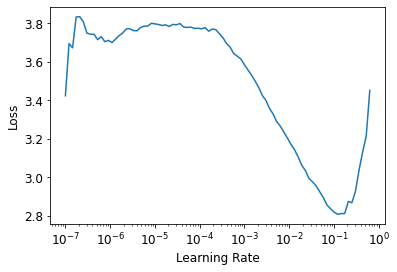

In [15]:
dls = dblock.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.lr_find()

In [21]:
dls = dblock.dataloaders(path)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(4, base_lr=1e-2, freeze_epochs=3)

epoch,train_loss,valid_loss,accuracy,time
0,0.808692,0.518689,0.826900,00:59
1,0.329210,0.148289,0.956000,00:56
2,0.219301,0.076362,0.976300,00:56


epoch,train_loss,valid_loss,accuracy,time
0,0.125019,0.040667,0.988600,01:10
1,0.073340,0.030420,0.990900,01:10
2,0.036732,0.021299,0.993400,01:10
3,0.032158,0.017102,0.995100,01:10


In [22]:
learn.export()

In [25]:
modelPath = Path()
modelPath.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [26]:
learn_inf = load_learner(modelPath/'export.pkl')

In [28]:
btn = widgets.FileUpload()
btn

FileUpload(value={}, description='Upload')

In [38]:
img = PILImage.create(btn.data[-1])
img = PILImage.create((path/'testing'/'8'/'1389.png'))
img

In [40]:
pred,pred_idx,probs = learn_inf.predict(img)
pred,pred_idx,probs[pred_idx]

('8', tensor(8), tensor(0.9999))

In [37]:
(path/'testing'/'8'/'1389.png')

NotADirectoryError: [Errno 20] Not a directory: '/storage/data/mnist_png/testing/8/1389.png'